# Fake News Detection

In [ ]:
pip install pandas numpy seaborn matplotlib scikit-learn

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
print("All libraries imported successfully!")

All libraries imported successfully!


## Importing Dataset

In [ ]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [ ]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Inserting a column "class" as target feature

In [ ]:
df_fake["class"] = 0
df_true["class"] = 1

In [ ]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [ ]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(len(df_fake)-1, len(df_fake)-11, -1):
    df_fake.drop([i], axis = 0, inplace = True)


df_true_manual_testing = df_true.tail(10)
for i in range(len(df_true)-1, len(df_true)-11, -1):
    df_true.drop([i], axis = 0, inplace = True)

In [ ]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [ ]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

/tmp/ipython-input-11-860779283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
/tmp/ipython-input-11-860779283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [ ]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [ ]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

## Merging True and Fake Dataframes

In [ ]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [ ]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

## Removing columns which are not required

In [ ]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [ ]:
df.isnull().sum()

,0
text,0
class,0


## Random Shuffling the dataframe

In [ ]:
df = df.sample(frac = 1)

In [ ]:
df.head()

,text,class
8938,The situation with the Bundy ranchers and thei...,0
20063,BERLIN (Reuters) - Support for Germany s cente...,1
13810,JAKARTA (Reuters) - The closure of I Gusti Ngu...,1
16994,"SOCHI, Russia (Reuters) - Russian President Vl...",1
3499,It s the lame duck session for Ohio s legislat...,0


In [ ]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['text', 'class'], dtype='object')

In [ ]:
df.head()

,text,class
0,The situation with the Bundy ranchers and thei...,0
1,BERLIN (Reuters) - Support for Germany s cente...,1
2,JAKARTA (Reuters) - The closure of I Gusti Ngu...,1
3,"SOCHI, Russia (Reuters) - Russian President Vl...",1
4,It s the lame duck session for Ohio s legislat...,0


## Creating a function to process the texts

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df["text"] = df["text"].apply(wordopt)

In [ ]:
print(wordopt("Breaking: Congress wins by huge margin in Kerala"))

breaking  congress wins by huge margin in kerala


## Defining dependent and independent variables

In [ ]:
x = df["text"]
y = df["class"]

## Splitting Training and Testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## Convert text to vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test)

0.9951871657754011

In [63]:
accuracy_dt = accuracy_score(y_test, pred_dt)
print("Accuracy of Decision Tree Classification: {:.2f}%".format(accuracy_dt * 100))

Accuracy of Decision Tree Classification: 99.52%


In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5893
           1       1.00      0.99      0.99      5327

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc = RFC.predict(xv_test)

In [ ]:
RFC.score(xv_test, y_test)

0.9889483065953654

In [62]:
accuracy_rf = accuracy_score(y_test, pred_rfc)
print("Accuracy of Random Forest Classifier: {:.2f}%".format(accuracy_rf * 100))

Accuracy of Random Forest Classifier: 98.89%


In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5893
           1       0.99      0.99      0.99      5327

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



/tmp/ipython-input-66-1821077004.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models, y=accuracies, palette='viridis')


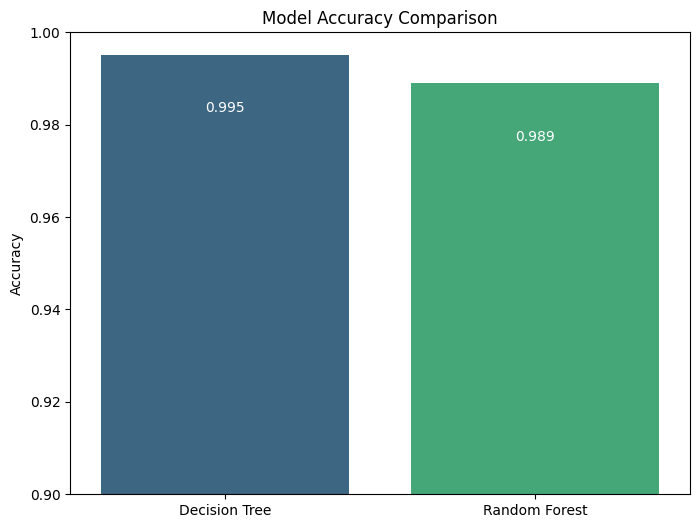

In [66]:
models = ['Decision Tree', 'Random Forest']
accuracies = [accuracy_dt, accuracy_rf]

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=models, y=accuracies, palette='viridis')

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)

for i, acc in enumerate(accuracies):
    ax.text(i, acc - 0.01, f'{acc:.3f}', ha='center', va='top', color='white', fontsize=10)

plt.show()

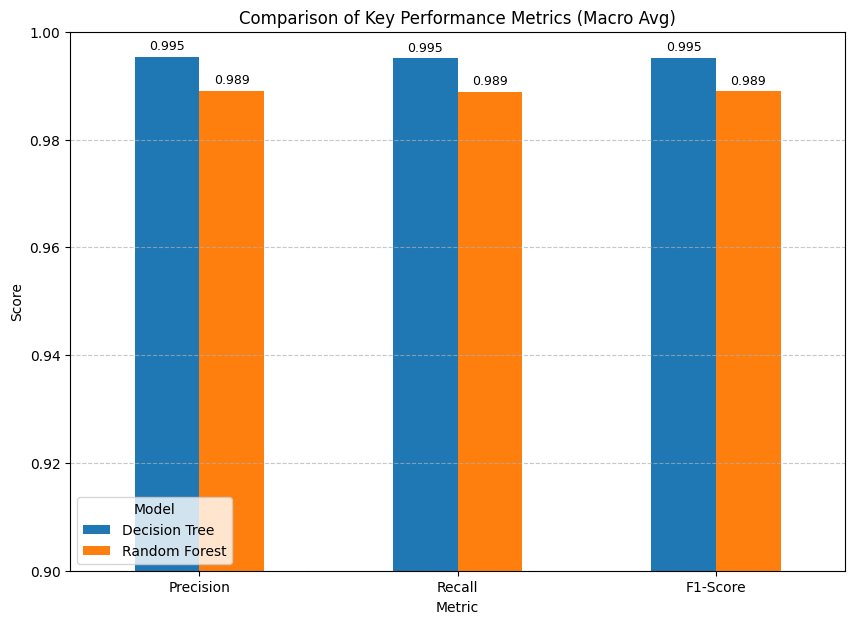

In [67]:
#Performance Metrics (Precision, Recall, F1-Score)

y_pred_dt = DT.predict(xv_test)
y_pred_rf = RFC.predict(xv_test)

report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# macro avg
dt_precision = report_dt['macro avg']['precision']
dt_recall = report_dt['macro avg']['recall']
dt_f1 = report_dt['macro avg']['f1-score']

rf_precision = report_rf['macro avg']['precision']
rf_recall = report_rf['macro avg']['recall']
rf_f1 = report_rf['macro avg']['f1-score']

metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Decision Tree': [dt_precision, dt_recall, dt_f1],
    'Random Forest': [rf_precision, rf_recall, rf_f1]
}).set_index('Metric')

ax = metrics_df.plot(kind='bar', figsize=(10, 7))
plt.title('Comparison of Key Performance Metrics (Macro Avg)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0.9, 1.0)
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.show()


## Model Testing

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "True News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)

    pred_DT = DT.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nDT Prediction: {}\nRFC Prediction: {}".format(output_lable(pred_DT[0]),
                                                                    output_lable(pred_RFC[0])))

TEST CASES

FAKE NEWS:


1. Secret “Carbon Reset” Agenda Revealed — Global Authorities Plan to Mask CO₂ Targets

In a move reminiscent of past era manipulations, global energy and finance elites have quietly agreed on a “Carbon Reset” strategy designed to covertly reduce fossil fuel use—without raising public concerns. High-level sources indicate that major banks, consortiums of oil companies, and green investment firms formed a secret working group in late 2024 to coordinate messaging on climate action.

Dubbed Project WhisperWind, this plan intentionally uses ambiguity and fear-based narratives—such as extreme weather alerts and alarmist carbon graphs—to drive the public toward accepting draconian carbon credits, smart grid monitors, and geoengineering projects they otherwise would reject.

“They’re planning to impose this under the guise of ‘voluntary’ choices,” warns Dr. Selena Marcos, a former UN climate advisor turned whistleblower. “Once public trust is manufactured, the real policies follow—without democratic debate.”

Media Synchronization Tactics

Corporate streaming platforms and major news outlets have reportedly coordinated pre-approved scripts, graphics, and hashtags for a “Climate Week” blitz universe. Independent climate skeptics see their content downgraded by algorithms, while AI voice bots amplify the official narrative.

Adding even more shock to the mix, insiders suggest that top-tier celebrities are being privately contracted to promote “volunteer carbon passports” on social media—promoting compliance through popularity, rather than legislation.

Astro-Pop Activism

Termed “astro-pop activism” by culture analysts, this movement blends celebrity culture with faux grassroots energy initiatives—featuring beach clean-ups, tree-planting selfies, and “carbon-offset challenges.” But critics say it’s a distraction.

“People feel good posting a tree selfie,” says activist Mia Ortega, “while behind closed doors they sign binding smart-meter contracts that siphon data and control home energy use.”

Why It Matters Now

In 2025, carbon markets have grown more complex, and 80 countries are updating climate regulations. Project WhisperWind intends to roll out versions of smart-meter mandates, voluntary data-sharing contracts, and geoengineering roadmaps—all packaged as benevolent consumer choices.

In [ ]:
#FAKE NEWS
news = str(input())
manual_testing(news)

Secret “Carbon Reset” Agenda Revealed — Global Authorities Plan to Mask CO₂ Targets In a move reminiscent of past era manipulations, global energy and finance elites have quietly agreed on a “Carbon Reset” strategy designed to covertly reduce fossil fuel use—without raising public concerns. High-level sources indicate that major banks, consortiums of oil companies, and green investment firms formed a secret working group in late 2024 to coordinate messaging on climate action.  Dubbed Project WhisperWind, this plan intentionally uses ambiguity and fear-based narratives—such as extreme weather alerts and alarmist carbon graphs—to drive the public toward accepting draconian carbon credits, smart grid monitors, and geoengineering projects they otherwise would reject.  “They’re planning to impose this under the guise of ‘voluntary’ choices,” warns Dr. Selena Marcos, a former UN climate advisor turned whistleblower. “Once public trust is manufactured, the real policies follow—without democra

2. By Elena Gray | TruthWave Media
Corporate PsyOps: How Elites Are Reprogramming Minds Through “Consensus Science”

In an era where information is the new gold, powerful tech and pharma conglomerates have launched an unprecedented psychological campaign to mold public perception. Behind the scenes, a billion-dollar machinery runs 24/7 to construct narratives — not truths — that condition the global population to comply, consume, and conform.

What most people consider “science” today is often just well-marketed opinion. Termed Consensus Science, it is not built on critical peer review or open inquiry, but on press releases, industry-funded studies, and expert panels handpicked by those with vested interests. These orchestrated messages are amplified through controlled media networks owned by the same handful of corporate titans — Amazon, Alphabet, Pfizer, and Meta — which dominate both what we see and how we think.

Modern Propaganda 2.0: Social Validation Engineering

Gone are the days of brute censorship. Today’s strategy involves algorithmic invisibility. Critical voices, whistleblowers, and independent researchers are quietly buried under heaps of digital noise. Hashtags are hijacked. Comment sections are policed by bots. Wikipedia edits vanish overnight.

This is no accident. This is a coordinated digital psyop.

“We are witnessing the rise of a synthetic reality,” says Dr. Alia Romanov, a former behavioral scientist with a U.S. defense think tank. “Social media platforms are no longer just tech tools; they are behavioral modification devices. Every ‘like,’ share, or ban is part of a larger system that is training society like lab rats.”

Astroturfing in Disguise

Grassroots? Think again.

Behind every trending hashtag or online “movement” is often a corporate sponsor, posing as the public. Fake users, paid influencers, and AI-generated personas flood online spaces to make fringe ideas appear mainstream — a tactic known as digital astroturfing.

This was evident in the 2024 CleanCloud campaign — a so-called environmental movement later exposed as a front for a tech conglomerate pushing e-waste-intensive cloud storage systems.

The Illusion of Choice

While citizens believe they’re choosing between outlets like CNN, NBC, or Vox, they are unknowingly consuming news curated by the same six parent companies — a monopoly disguised as a marketplace.

As veteran media analyst Reed Porter explains:

“It’s a controlled demolition of independent thought. The more options people think they have, the less they question any of them.”

In [ ]:
#FAKE NEWS
news = str(input())
manual_testing(news)

By Elena Gray | TruthWave Media Corporate PsyOps: How Elites Are Reprogramming Minds Through “Consensus Science” In an era where information is the new gold, powerful tech and pharma conglomerates have launched an unprecedented psychological campaign to mold public perception. Behind the scenes, a billion-dollar machinery runs 24/7 to construct narratives — not truths — that condition the global population to comply, consume, and conform.  What most people consider “science” today is often just well-marketed opinion. Termed Consensus Science, it is not built on critical peer review or open inquiry, but on press releases, industry-funded studies, and expert panels handpicked by those with vested interests. These orchestrated messages are amplified through controlled media networks owned by the same handful of corporate titans — Amazon, Alphabet, Pfizer, and Meta — which dominate both what we see and how we think.  Modern Propaganda 2.0: Social Validation Engineering  Gone are the days o

TRUE NEWS
1. JOHANNESBURG (Reuters) – David Mabuza, a powerful figure in South African politics who served as deputy president from 2018 to 2023, has died at age 64, the South African Broadcasting Corporation (SABC) reported on July 3, 2025 Mabuza passed away in a Johannesburg hospital after a period of illness, though no specific cause of death was released. He had been a key strategist in the African National Congress (ANC), notably backing Cyril Ramaphosa during the critical 2017 ANC leadership contest that led to Ramaphosa's rise to the presidency in 2018. Before becoming deputy president, Mabuza held prominent roles, including Premier of Mpumalanga and a high school teacher early in his career. His tenure, however, was not without controversy: he faced allegations— which he denied—of improper tender irregularities connected to the 2010 FIFA World Cup stadium contracts and of ties to political violence.  Recent years saw Mabuza stepping back from public life due to ongoing health issues. His political legacy remains mixed: admired for his influence and pragmatism, yet also shadowed by persistent controversy.

In [ ]:
#TRUE NEWS
news = str(input())
manual_testing(news)

JOHANNESBURG (Reuters) – David Mabuza, a powerful figure in South African politics who served as deputy president from 2018 to 2023, has died at age 64, the South African Broadcasting Corporation (SABC) reported on July 3, 2025 Mabuza passed away in a Johannesburg hospital after a period of illness, though no specific cause of death was released. He had been a key strategist in the African National Congress (ANC), notably backing Cyril Ramaphosa during the critical 2017 ANC leadership contest that led to Ramaphosa's rise to the presidency in 2018. Before becoming deputy president, Mabuza held prominent roles, including Premier of Mpumalanga and a high school teacher early in his career. His tenure, however, was not without controversy: he faced allegations— which he denied—of improper tender irregularities connected to the 2010 FIFA World Cup stadium contracts and of ties to political violence. Recent years saw Mabuza stepping back from public life due to ongoing health issues. His pol

NEW DELHI (Reuters) – A preliminary probe into the Air India Boeing 787 Dreamliner crash near Ahmedabad on June 12, 2025, reveals that confusion over engine fuel cutoff switches played a critical role, the Aircraft Accident Investigation Bureau (AAIB) reported on Friday .  Cockpit voice recordings show that shortly after takeoff, both pilots questioned the activation of the fuel cutoff switches, which unexpectedly flipped nearly simultaneously. This sudden shutdown caused a rapid loss of thrust, leading to a steep descent before the aircraft impacted the ground.  Although both engines later attempted to relight and the switches were found in the ‘run’ position at the crash site, investigators have yet to determine whether the switches were toggled intentionally or accidentally—a move experts consider highly improbable.  The accident, which claimed 260 lives, marks India’s deadliest aviation disaster in over a decade. It poses a significant challenge to Air India’s revitalization efforts since its acquisition by the Tata Group in 2022. Boeing, GE, and U.S. aviation authorities are collaborating with the AAIB on the ongoing investigation.  No regulatory actions have been issued to other Boeing 787 operators, and the AAIB said it will await more comprehensive analysis before recommending any safety directives.


In [ ]:
#TRUE NEWS
news = str(input())
manual_testing(news)

NEW DELHI (Reuters) – A preliminary probe into the Air India Boeing 787 Dreamliner crash near Ahmedabad on June 12, 2025, reveals that confusion over engine fuel cutoff switches played a critical role, the Aircraft Accident Investigation Bureau (AAIB) reported on Friday . Cockpit voice recordings show that shortly after takeoff, both pilots questioned the activation of the fuel cutoff switches, which unexpectedly flipped nearly simultaneously. This sudden shutdown caused a rapid loss of thrust, leading to a steep descent before the aircraft impacted the ground. Although both engines later attempted to relight and the switches were found in the ‘run’ position at the crash site, investigators have yet to determine whether the switches were toggled intentionally or accidentally—a move experts consider highly improbable. The accident, which claimed 260 lives, marks India’s deadliest aviation disaster in over a decade. It poses a significant challenge to Air India’s revitalization efforts s